In [1]:
import numpy as np
import Conv
import matplotlib.pyplot as plt

c1 = Conv.Conv((2,2,1), padding=(1,1))

In [2]:
c1.kernel = np.array(((2,3),(4,5))).reshape(2,2,1)
d = c1.forward(np.array(((1,2),(3,4))).reshape(2,2,1))
print(d)
print(c1.kernel)
print(d.shape)

[[ 5. 14.  8.]
 [18. 40. 20.]
 [ 9. 18.  8.]]
[[[2]
  [3]]

 [[4]
  [5]]]
(3, 3)


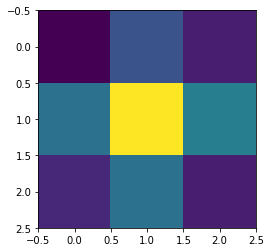

In [3]:
plt.imshow(d)

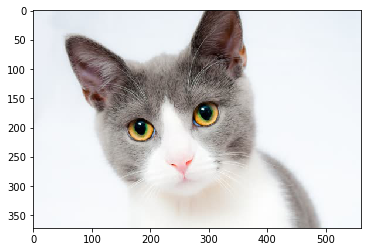

In [4]:
# загрузка изображений
from PIL import Image
cat_convolve = np.array(Image.open('./cat_convolve.jpg'))
plt.imshow(cat_convolve)

In [5]:
filter_kernel = -np.ones((3,3,3))
filter_kernel[1,1,:] = 8
print(filter_kernel.shape)
print(filter_kernel)

(3, 3, 3)
[[[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]

 [[-1. -1. -1.]
  [ 8.  8.  8.]
  [-1. -1. -1.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]]


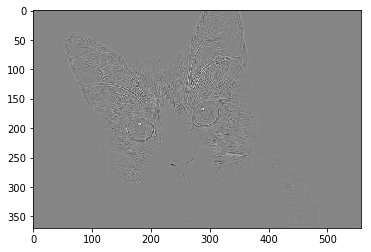

In [6]:
c2 = Conv.Conv((3, 3, 3), bias=False)
c2.kernel = filter_kernel
ans = c2.forward(cat_convolve)
#ans = np.where(ans >= 0.5, 1, 0)
#print(ans)
plt.imshow(ans, cmap='gray')
plt.savefig('1')

In [11]:
filter_kernel = np.ones((3,3,3))
filter_kernel[1,:,:] = 0
filter_kernel[2,:,:] = -1
print(filter_kernel.shape)
print(filter_kernel)

(3, 3, 3)
[[[ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]]


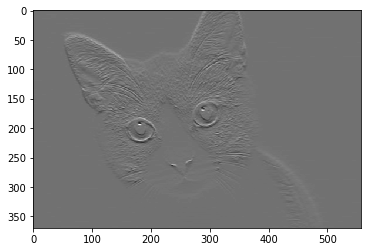

In [12]:
c2.kernel = filter_kernel
ans = c2.forward(cat_convolve)
#ans = np.where(ans >= 0.5, 1, 0)
#print(ans)
plt.imshow(ans, cmap='gray')
plt.savefig('2')

(11, 11, 3)


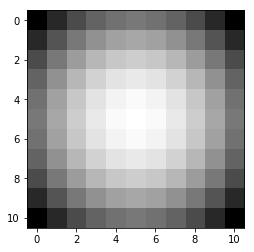

In [9]:
import scipy.ndimage as ndi
import numpy as np
sigma = 10    # параметр распределение
patern_size = 101 # максимальный размер ядра свертки
kernel_size = 10  # реальный размер свертки
x = np.zeros((patern_size, patern_size))
x [patern_size//2,patern_size//2]= 1

# делаем ядро с гаусовым распределением
gause_kernel = ndi.filters.gaussian_filter(x, sigma=sigma)
# вырезаем из центра наш кернел
gause_kernel = gause_kernel[(patern_size//2-(kernel_size//2)):(patern_size//2+(kernel_size//2))+1, \
                (patern_size//2-(kernel_size//2)):(patern_size//2+(kernel_size//2))+1]
# вот он
plt.imshow(gause_kernel, interpolation='none', cmap=plt.get_cmap('gray'))
gause_kernel = np.stack((gause_kernel, gause_kernel, gause_kernel), axis=-1)
print(gause_kernel.shape)

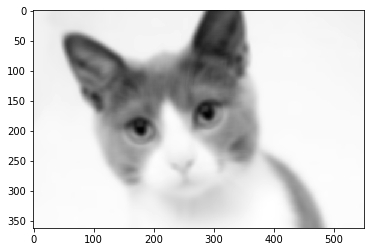

In [10]:
c2.kernel = gause_kernel
ans = c2.forward(cat_convolve)
#ans = np.where(ans >= 0.5, 1, 0)
#print(ans)
plt.imshow(ans, cmap='gray')
plt.savefig('3')